In [53]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import explained_variance_score
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV


In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import cm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.decomposition import PCA, FactorAnalysis, NMF
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [44]:
wine_dataset = pd.read_csv("wine_dataset.csv")
ufc_dataset = pd.read_csv("ufc_data.csv")
ufc_dataset.loc[ufc_dataset["Winner"] == "Red", "Winner"] = 1
ufc_dataset.loc[ufc_dataset["Winner"] == "Blue", "Winner"] = 0
ufc_dataset.drop(["no_of_rounds"], axis=1 ,inplace=True)
# al zero
ufc_dataset.drop(["B_draw"], axis=1 ,inplace=True)
ufc_dataset.drop(["R_draw"], axis=1 ,inplace=True)

ufcX = ufc_dataset.drop("Winner", 1).copy().values
ufcY = ufc_dataset["Winner"].copy().values
ufc_x_df = ufc_dataset.drop("Winner",1)

wineX = wine_dataset.drop("class", 1).copy().values
wineY = wine_dataset["class"].copy().values
wine_x_df = wine_dataset.drop("class",1)


min_max_scaler = preprocessing.MinMaxScaler()
ufcX = min_max_scaler.fit_transform(ufcX)
ufcX_df = pd.DataFrame(ufcX, columns=ufc_x_df.columns)
wineX = min_max_scaler.fit_transform(wineX)
wineX_df = pd.DataFrame(wineX, columns=wine_x_df.columns)

In [45]:
model = FactorAnalysis(n_components=10, random_state=44)
x_prime = model.fit_transform(ufcX)

In [38]:
ufcX.shape
dims_ufc = list(range(2,100,5))

In [58]:
n_features

13

In [57]:
sfm = SelectFromModel(LassoCV(max_iter=10000), threshold=0.1)
sfm.fit(ufcX, ufcY)
n_features = sfm.transform(ufcX).shape[1]

In [61]:
x_prime = sfm.transform(ufcX)

In [ ]:
A = np.linalg.pinv(fa.components_.T)
reconstructed = np.dot(x_prime, A)
rc_err = mean_squared_error(ufcX_df.values, reconstructed)    
rc_errors[dim] = rc_err

In [72]:
np.arange(0.001, 0.3, 0.02)

array([0.001, 0.021, 0.041, 0.061, 0.081, 0.101, 0.121, 0.141, 0.161,
       0.181, 0.201, 0.221, 0.241, 0.261, 0.281])

In [77]:
sfm = SelectFromModel(LassoCV(max_iter=10000), max_features=40)
sfm.fit(ufcX, ufcY)
ufcX_40 = sfm.transform(ufcX)
sfm.transform(ufcX).shape[1]


40

## UFC Clustering on FeatureSelection

In [79]:
from sklearn.cluster import KMeans
clusters = list(range(2,31,1))

For n_clusters=2, The Silhouette Coefficient is 0.16234100717362587
For n_clusters=2, The homogeneity_score is 0.00043524792991972834
For n_clusters=3, The Silhouette Coefficient is 0.16753312019383212
For n_clusters=3, The homogeneity_score is 0.0005998379853170648
For n_clusters=4, The Silhouette Coefficient is 0.17226741423697015
For n_clusters=4, The homogeneity_score is 0.0007054997825279025
For n_clusters=5, The Silhouette Coefficient is 0.18090732487479716
For n_clusters=5, The homogeneity_score is 0.0016766357460172882
For n_clusters=6, The Silhouette Coefficient is 0.1823734813930422
For n_clusters=6, The homogeneity_score is 0.002446848667091843
For n_clusters=7, The Silhouette Coefficient is 0.19122452453430344
For n_clusters=7, The homogeneity_score is 0.003240623687112069
For n_clusters=8, The Silhouette Coefficient is 0.1923960615982439
For n_clusters=8, The homogeneity_score is 0.0027135176320897438
For n_clusters=9, The Silhouette Coefficient is 0.20265736986135277
For 

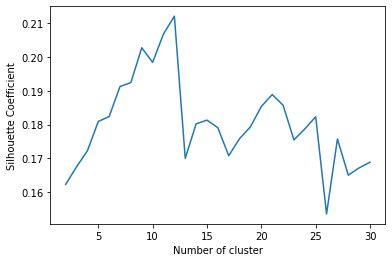

In [80]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, homogeneity_score
silh = {}
homog = {}
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=1000, random_state=44, n_jobs=-2).fit(ufcX_40)
    label = kmeans.labels_
    sil_coeff = silhouette_score(ufcX_40, label, metric='euclidean')
    homog_score = homogeneity_score(ufcY, label)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.plot(list(silh.keys()), list(silh.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

For n_clusters=2, The Silhouette Coefficient is 0.14135958838483748
For n_clusters=2, The homogeneity_score is 8.973115053065334e-05
For n_clusters=2, The log_likelihood score is 34.28366792149698
For n_clusters=3, The Silhouette Coefficient is 0.07211958326785055
For n_clusters=3, The homogeneity_score is 0.0002122498983856732
For n_clusters=3, The log_likelihood score is 44.993798684594466
For n_clusters=4, The Silhouette Coefficient is 0.14608129571199036
For n_clusters=4, The homogeneity_score is 0.0049893360885057275
For n_clusters=4, The log_likelihood score is 51.90441458756894
For n_clusters=5, The Silhouette Coefficient is 0.18850647757745334
For n_clusters=5, The homogeneity_score is 0.002514445690837587
For n_clusters=5, The log_likelihood score is 52.944980849158306
For n_clusters=6, The Silhouette Coefficient is 0.17637733017075408
For n_clusters=6, The homogeneity_score is 0.007968061508103766
For n_clusters=6, The log_likelihood score is 57.04044714117446
For n_clusters=

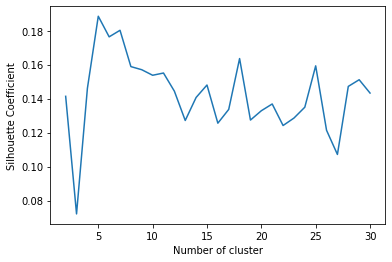

In [81]:
from sklearn.mixture import GaussianMixture
silh_EM = {}
homog_EM = {}
log_likelihood_EM = {}
for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=44, 
                          n_init=5).fit(ufcX_40)
    label = gmm.predict(ufcX_40)
    sil_coeff = silhouette_score(ufcX_40, label, metric='euclidean')
    homog_score = homogeneity_score(ufcY, label)
    silh_EM[cluster] = sil_coeff
    homog_EM[cluster] = homog_score
    log_likelihood_EM[cluster] = gmm.score(ufcX_40)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For n_clusters={}, The log_likelihood score is {}".format(cluster, log_likelihood_EM[cluster]))

    
plt.figure()
plt.plot(list(silh_EM.keys()), list(silh_EM.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

# WINE DATASET

In [137]:
dims_wine = list(range(1,14,1))

In [78]:
sfm = SelectFromModel(LassoCV(max_iter=10000), max_features=5)
sfm.fit(wineX, wineY)
wineX_5 = sfm.transform(wineX)
sfm.transform(wineX).shape[1]

5

For n_clusters=2, The Silhouette Coefficient is 0.29442147217296744
For n_clusters=2, The homogeneity_score is 0.2874191656823064
For n_clusters=3, The Silhouette Coefficient is 0.2894844717474823
For n_clusters=3, The homogeneity_score is 0.603607528723009
For n_clusters=4, The Silhouette Coefficient is 0.2558411762574795
For n_clusters=4, The homogeneity_score is 0.5594129433402133
For n_clusters=5, The Silhouette Coefficient is 0.23272082123779572
For n_clusters=5, The homogeneity_score is 0.550914524568426
For n_clusters=6, The Silhouette Coefficient is 0.21987385259456918
For n_clusters=6, The homogeneity_score is 0.564145672747921
For n_clusters=7, The Silhouette Coefficient is 0.1979234062977278
For n_clusters=7, The homogeneity_score is 0.6064623670402484
For n_clusters=8, The Silhouette Coefficient is 0.2013330961501945
For n_clusters=8, The homogeneity_score is 0.6014101147796581
For n_clusters=9, The Silhouette Coefficient is 0.19913285369024603
For n_clusters=9, The homogen

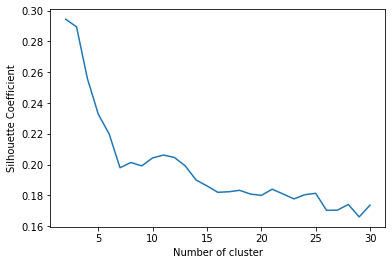

In [82]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, homogeneity_score
silh_wine = {}
homog_wine = {}
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=1000, random_state=44, n_jobs=-2).fit(wineX_5)
    label = kmeans.labels_
    sil_coeff = silhouette_score(wineX_5, label, metric='euclidean')
    homog_score = homogeneity_score(wineY, label)
    silh_wine[cluster] = sil_coeff
    homog_wine[cluster] = homog_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.plot(list(silh_wine.keys()), list(silh_wine.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

For n_clusters=2, The Silhouette Coefficient is 0.2809263733765838
For n_clusters=2, The homogeneity_score is 0.28065408675400827
For n_clusters=2, The log_likelihood score is 1.5141915643474253
For n_clusters=3, The Silhouette Coefficient is 0.2797249942935
For n_clusters=3, The homogeneity_score is 0.6223872108190093
For n_clusters=3, The log_likelihood score is 1.6636661821938128
For n_clusters=4, The Silhouette Coefficient is 0.24971554202935486
For n_clusters=4, The homogeneity_score is 0.5570399639128037
For n_clusters=4, The log_likelihood score is 1.7196207362797922
For n_clusters=5, The Silhouette Coefficient is 0.2122311369504714
For n_clusters=5, The homogeneity_score is 0.5617451252772928
For n_clusters=5, The log_likelihood score is 1.8012656468187411
For n_clusters=6, The Silhouette Coefficient is 0.107978780736712
For n_clusters=6, The homogeneity_score is 0.5690583462364983
For n_clusters=6, The log_likelihood score is 1.8593807540034712
For n_clusters=7, The Silhouette

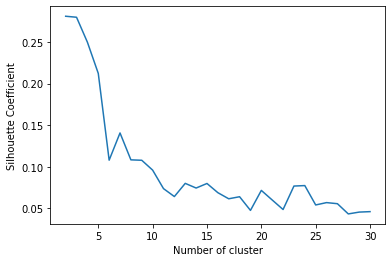

In [83]:
from sklearn.mixture import GaussianMixture
silh_wine_EM = {}
homog__wine_EM = {}
log_likelihood_wine_EM = {}
for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=44, 
                          n_init=5).fit(wineX_5)
    label = gmm.predict(wineX_5)
    sil_coeff = silhouette_score(wineX_5, label, metric='euclidean')
    homog_score = homogeneity_score(wineY, label)
    silh_wine_EM[cluster] = sil_coeff
    homog__wine_EM[cluster] = homog_score
    log_likelihood_wine_EM[cluster] = gmm.score(wineX_5)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For n_clusters={}, The log_likelihood score is {}".format(cluster, log_likelihood_wine_EM[cluster]))
plt.figure()
plt.plot(list(silh_wine_EM.keys()), list(silh_wine_EM.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Neural Network on Lasso Selection

In [84]:
wineX_5

array([[0.45278833, 0.16324404, 0.63562841, 0.58443874, 0.39900913],
       [0.59971732, 0.66502981, 0.79029281, 0.57117012, 0.06515142],
       [0.32610067, 0.64000791, 0.19299212, 0.15674798, 0.2589894 ],
       ...,
       [0.60568197, 0.36915137, 0.692712  , 0.72722716, 0.12241821],
       [0.5746162 , 0.19037947, 0.63688772, 0.65523394, 0.04467458],
       [0.48031643, 0.0990761 , 0.46836756, 0.7132111 , 0.29157602]])

In [85]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.neural_network import MLPClassifier
neural_net = MLPClassifier()
neural_net.fit(wineX_5, wineY)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [86]:
# first net results
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
ufc_train_predictions = neural_net.predict(wineX_5)
accuracy = accuracy_score(wineY, ufc_train_predictions)
print(accuracy)
print(classification_report(wineY, ufc_train_predictions))

0.9062
              precision    recall  f1-score   support

           1       0.92      0.91      0.92      1577
           2       0.89      0.91      0.90      2013
           3       0.91      0.90      0.90      1410

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



In [87]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(neural_net, wineX_5, wineY,
                         scoring="f1_weighted", cv=10)
scores, scores.mean()

(array([0.88837581, 0.88803779, 0.90232305, 0.90797457, 0.90411712,
        0.90798064, 0.91804546, 0.88803741, 0.89199471, 0.91829615]),
 0.9015182706825652)

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wineX_5, 
                                                    wineY, 
                                                    test_size=0.33, 
                                                    random_state=42,
                                                    stratify=wineY)

In [89]:
# stratified cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

def stratFold(train_X_all, train_y_all, classifier, metric, average=None,
              fold=5):
    train_metric, val_metric, indices = [], [], []
    for m in range(100, len(train_X_all), 100):
        train_X = train_X_all[:m]
        train_y = train_y_all[:m]
        skfolds = StratifiedKFold(n_splits=fold)
        metric_list = []
        metric_list_train = []
        for train_index, test_index in skfolds.split(train_X, train_y):
            train_X_folds = train_X[train_index, :]
            train_y_folds = train_y[train_index]
            test_X_fold = train_X[test_index, :]
            test_y_fold = train_y[test_index]
            classifier.fit(train_X_folds, train_y_folds)
            train_y_folds_pred = classifier.predict(train_X_folds)
            test_y_fold_pred = classifier.predict(test_X_fold)
            if average:
                metric_list.append(metric(test_y_fold, test_y_fold_pred,
                                     average=average))
                metric_list_train.append(metric(train_y_folds, train_y_folds_pred, 
                                            average=average))
            else:
                metric_list.append(metric(test_y_fold, test_y_fold_pred))
                metric_list_train.append(metric(train_y_folds, train_y_folds_pred))
                
        test_avg = sum(metric_list)/len(metric_list)
        train_avg = sum(metric_list_train)/len(metric_list_train)
        val_metric.append(test_avg)
        train_metric.append(train_avg)
        indices.append(m)
    
    return train_metric, val_metric, indices

In [90]:
def plot_complexity(train_scores, val_scores, indices, title, inverse_x=True):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()

In [91]:
def plot_learning_curve(train_scores, val_scores, indices, title, inverse_x=False):
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train")
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation")
    plt.title(title)
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    if inverse_x:
        plt.gca().invert_xaxis()

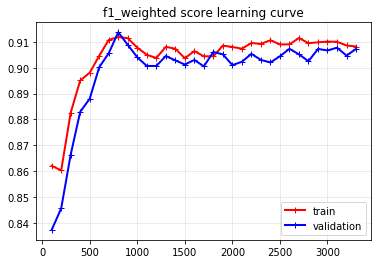

In [92]:
from sklearn.metrics import f1_score
f1_scores = stratFold(X_train, y_train, neural_net, f1_score, 
                      average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="f1_weighted score learning curve")

In [93]:
# start with the best net from Assignment 1
best_net = MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60, 60), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [94]:
from sklearn.metrics import f1_score
f1_scores = stratFold(X_train, y_train, best_net, 
                      f1_score, average="weighted")


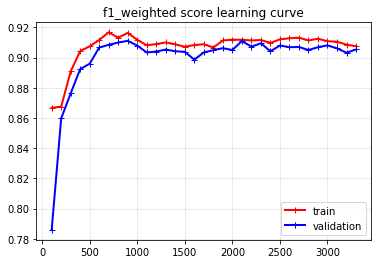

In [95]:
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="f1_weighted score learning curve")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   33.1s finished


[0.91074432 0.91032036 0.90860153] [0.90420278 0.90423193 0.90561155] [(60, 60), (80, 80), (100, 100)]


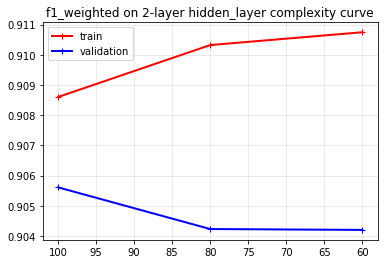

In [96]:
from sklearn.model_selection import validation_curve
params = [60, 80, 100]
param_range = [(60,60), (80,80), (100,100)]

train_scores, test_scores = validation_curve(
    best_net, X_train, y_train, param_name="hidden_layer_sizes", 
    param_range=param_range, scoring='f1_weighted', verbose=1, cv=5, n_jobs=-1
)
print(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range)
plot_complexity(train_scores.mean(axis=1), test_scores.mean(axis=1), params, 
                title='f1_weighted on 2-layer hidden_layer complexity curve', inverse_x=True)

In [97]:
# start with the best net from Assignment 1
best_net_LassoSelection = MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', 
                                        beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

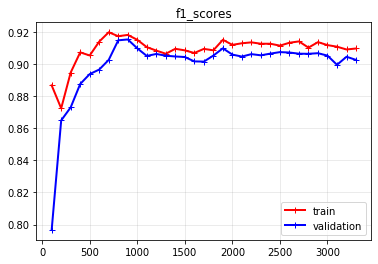

In [99]:
from sklearn.metrics import f1_score
f1_scores = stratFold(X_train, y_train, best_net_LassoSelection, 
                      f1_score, average="weighted")
plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], title="f1_scores")

In [101]:
from sklearn.metrics import confusion_matrix

best_net_LassoSelection.fit(X_train, y_train)
test_predictions = best_net_LassoSelection.predict(X_test)
print(classification_report(y_test, test_predictions, digits=5))
print(confusion_matrix(y_test, test_predictions))

              precision    recall  f1-score   support

           1    0.90286   0.90979   0.90631       521
           2    0.89833   0.89157   0.89494       664
           3    0.89914   0.90108   0.90011       465

    accuracy                        0.90000      1650
   macro avg    0.90011   0.90081   0.90045      1650
weighted avg    0.89999   0.90000   0.89998      1650

[[474  31  16]
 [ 41 592  31]
 [ 10  36 419]]
